# Reponses au controle Deep Learning

## Informations sur le dataset:

##### ***obj_ID***: Identifiant unique de l'objet.
##### ***alpha, delta:*** Coordonnées de l'objet dans le ciel.
##### ***u, g, r, i, z:*** Magnitudes apparentes de l'objet dans différentes bandes spectrales (u, g, r, i, z).
##### ***run_ID***, rerun_ID, cam_col, field_ID: Identifiants et détails concernant les observations et l'appareil utilisé.
##### ***spec_obj_ID***: Identifiant spécifique à l'objet observé.
##### ***class***: Type d'objet (GALAXY pour une galaxie, QSO pour un quasar, etc.).
##### ***redshift:*** Décalage vers le rouge, une mesure utilisée en astronomie pour estimer la distance des objets cosmiques en fonction du changement de longueur d'onde.
##### ***plate, MJD, fiber_ID:*** Détails spécifiques à l'observation et à l'instrumentation utilisée pour l'observation.

## 1. Prétraitement du dataset
#### 1.1 Chercher les valeurs Nan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [10]:
a, b, c = df["class"].value_counts() / len(df)
print(f"Total percentage of Galaxies : {round(a*100, 1)}%")
print(f"Total percentage of Stars : {round(b*100, 1)}%")
print(f"Total percentage of QSO : {round(c*100, 1)}%")

Total percentage of Galaxies : 59.4%
Total percentage of Stars : 21.6%
Total percentage of QSO : 19.0%


#### le dataset ne contient aucune valeur Nan

#### 1.2 Visualisation des données

(-1.0999985792345726,
 1.099998158841335,
 -1.0999995795420574,
 1.0999942892075507)

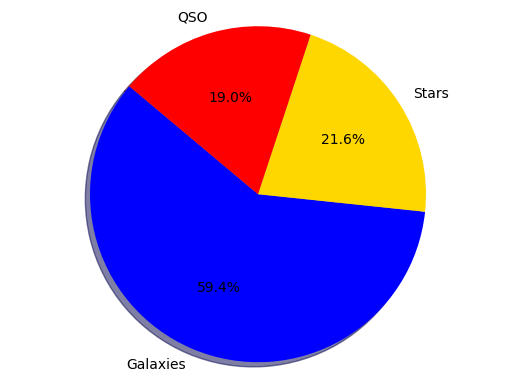

In [11]:
labels = ['Galaxies', 'Stars', 'QSO']
sizes = [a, b, c]
colors = ['blue', 'gold', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

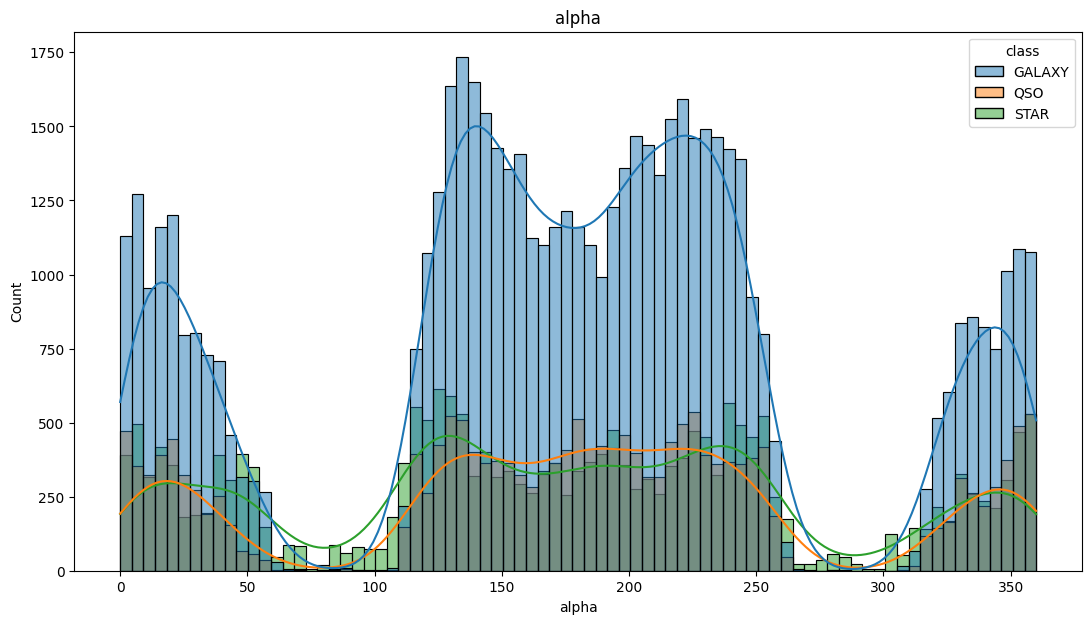

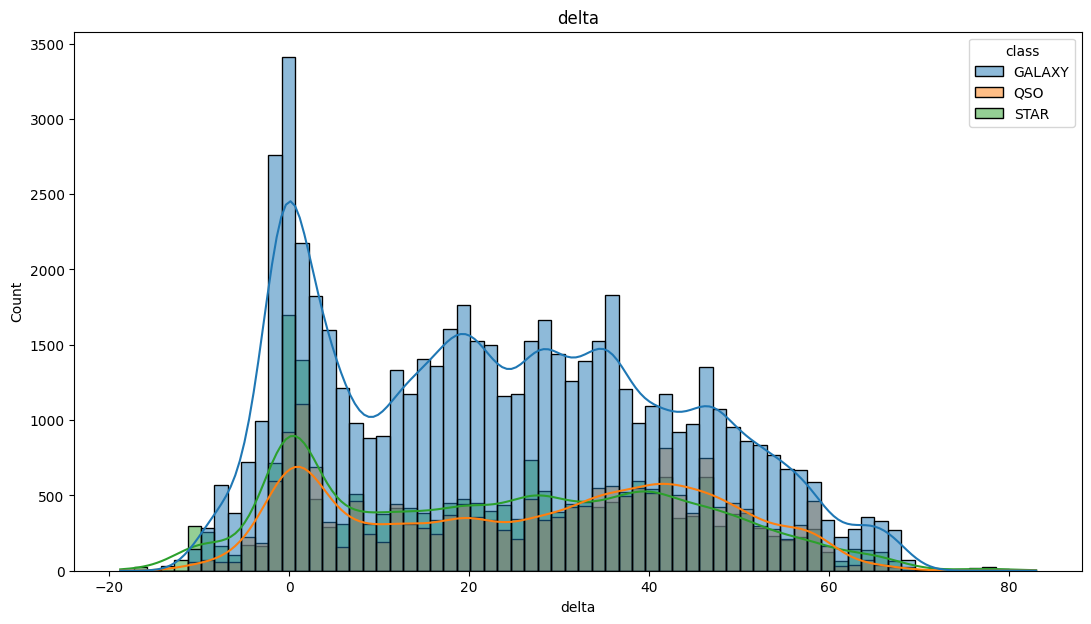

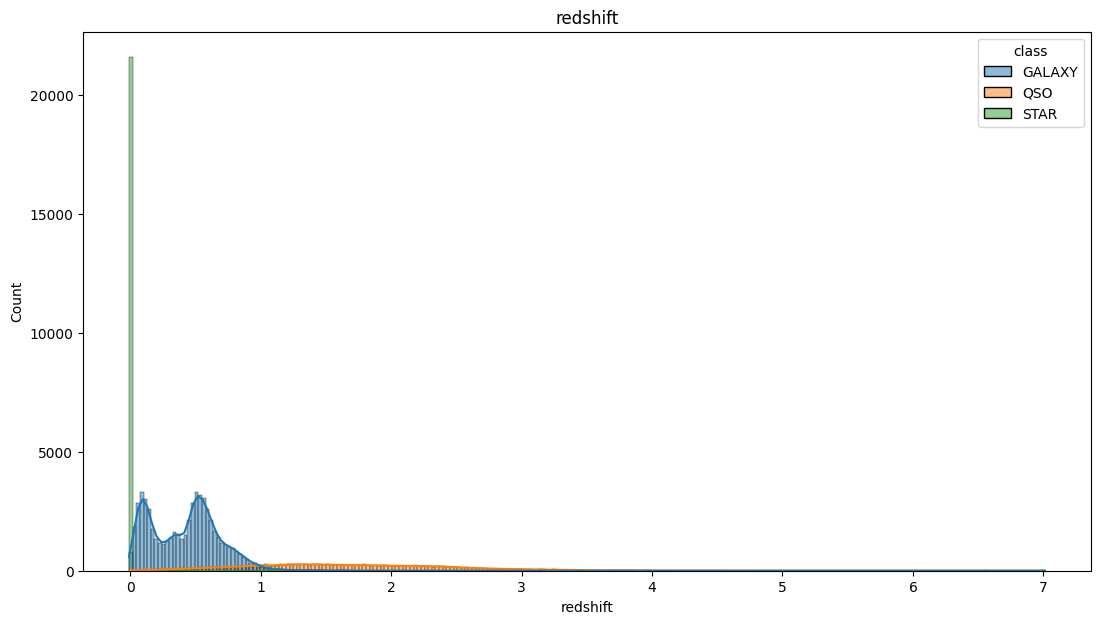

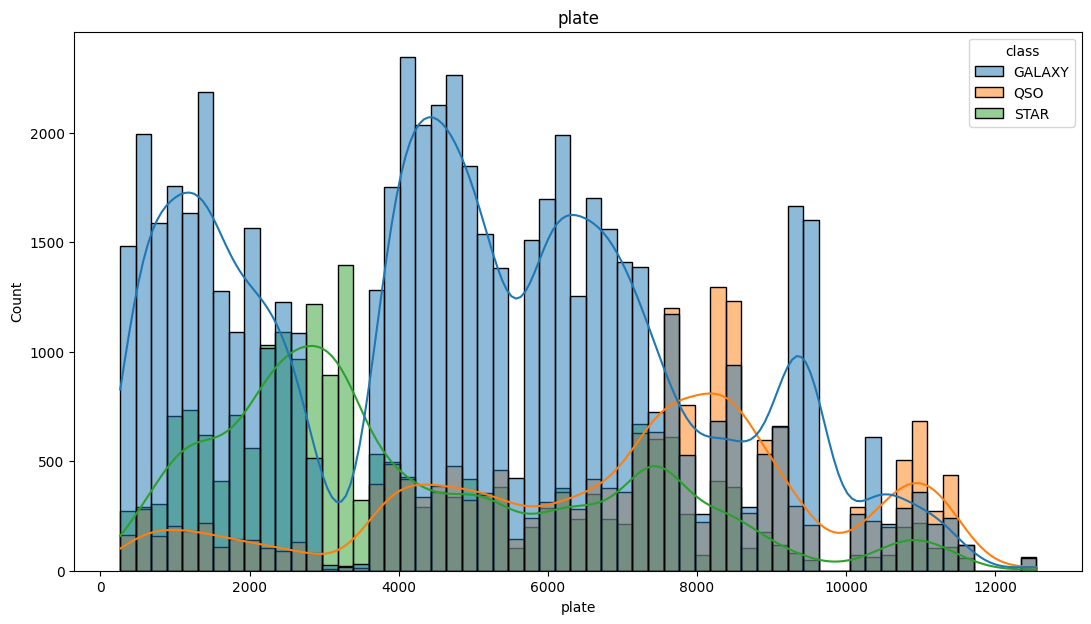

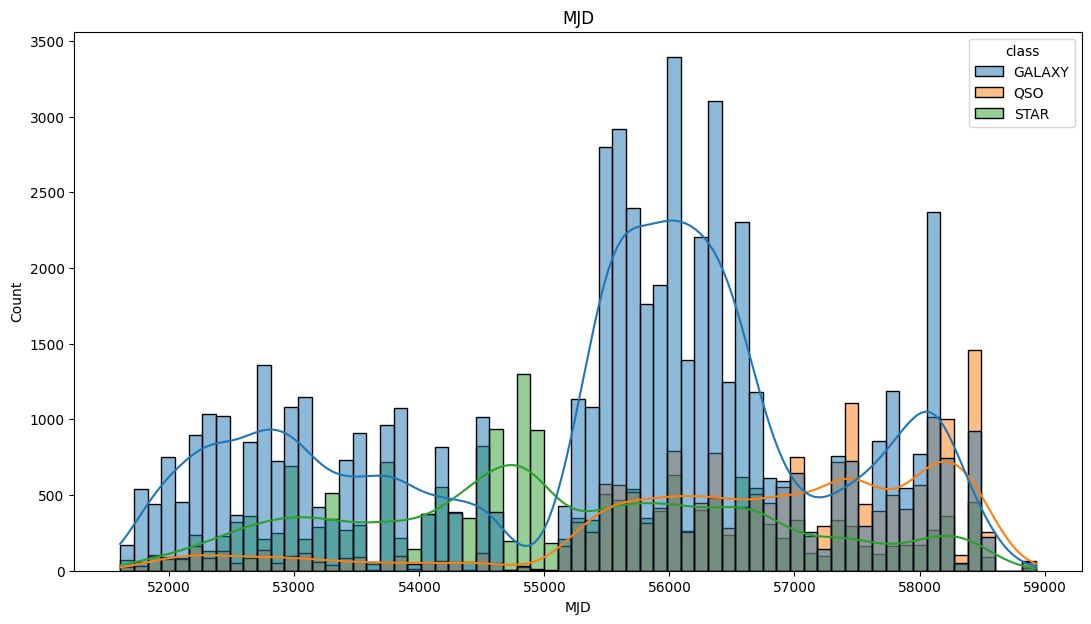

In [12]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=df, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

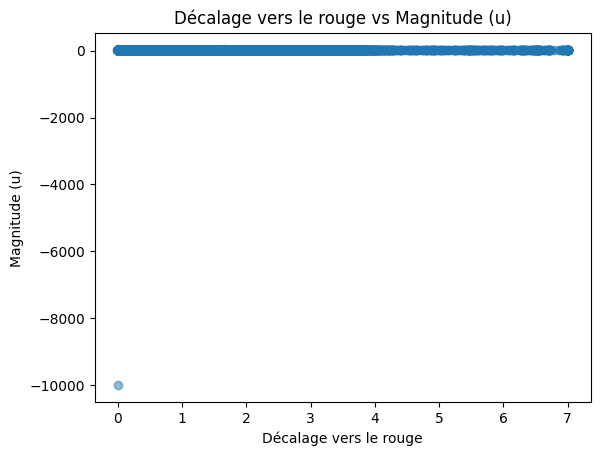

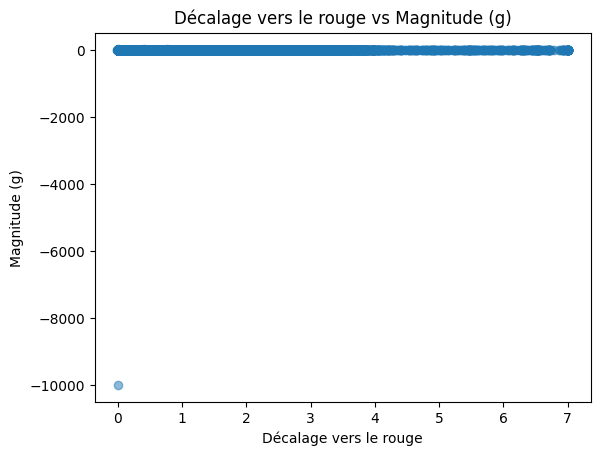

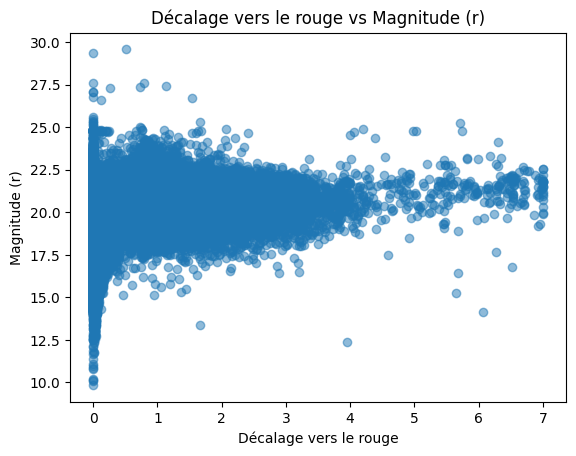

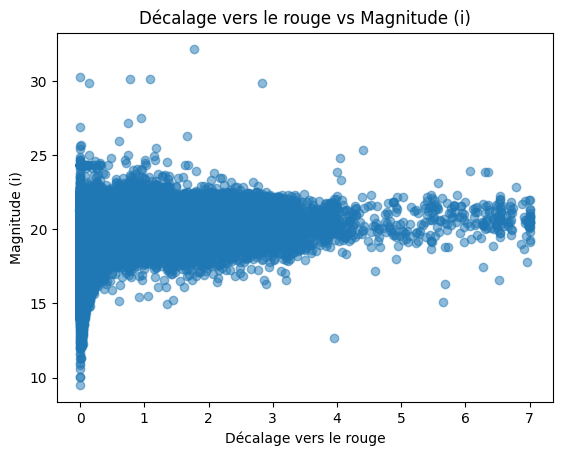

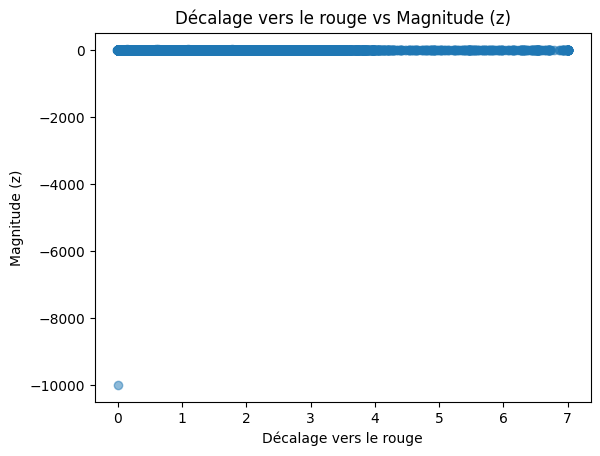

In [13]:
# Nuage de points du décalage vers le rouge par rapport aux magnitudes
for bande in ['u', 'g', 'r', 'i', 'z']:
    plt.figure()
    plt.scatter(df['redshift'], df[bande], alpha=0.5)
    plt.xlabel('Décalage vers le rouge')
    plt.ylabel(f'Magnitude ({bande})')
    plt.title(f'Décalage vers le rouge vs Magnitude ({bande})')
    plt.show()

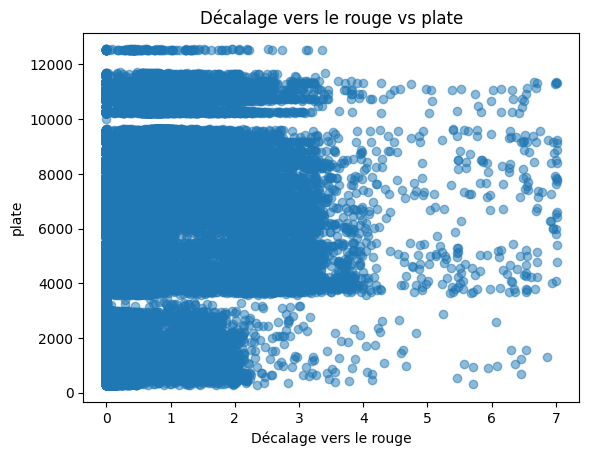

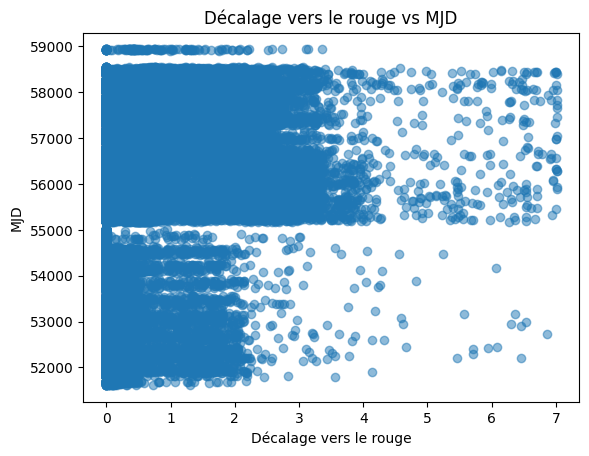

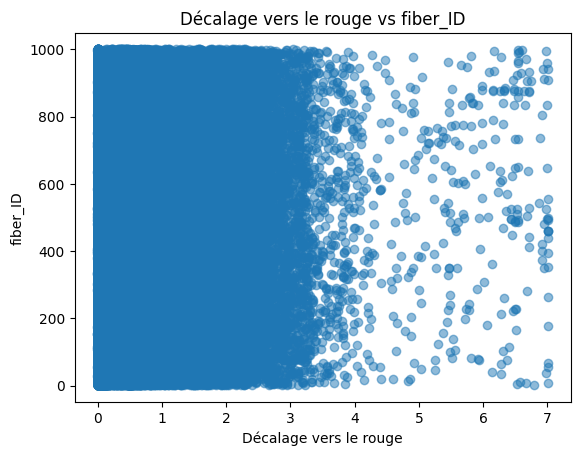

In [14]:
# Nuage de points pour le décalage vers le rouge vs Plate/MJD/Fiber_ID
for param in ['plate', 'MJD', 'fiber_ID']:
    plt.figure()
    plt.scatter(df['redshift'], df[param], alpha=0.5)
    plt.xlabel('Décalage vers le rouge')
    plt.ylabel(param)
    plt.title(f'Décalage vers le rouge vs {param}')
    plt.show()

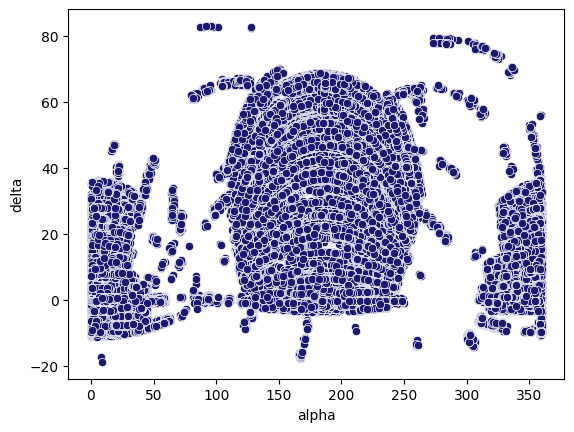

In [15]:
sns.scatterplot(x = df.alpha, y = df.delta, color="midnightblue")
plt.show()

### eliminer les outliers

In [16]:
# La fonction rem_outliers() pour supprimer les outliers
def rem_outliers():
    # Stocke la forme initiale du DataFrame 'df'
    s1 = df.shape

    # Parcourt les colonnes numériques du DataFrame 'df'
    for i in df.select_dtypes(include='number').columns:
        # Calcul des quartiles et de l'IQR pour la colonne en cours (i)
        qt1 = df[i].quantile(0.25)
        qt3 = df[i].quantile(0.75)
        iqr = qt3 - qt1
        
        # Calcul des bornes inférieure et supérieure pour les valeurs aberrantes
        lower = qt1 - (1.5 * iqr)
        upper = qt3 + (1.5 * iqr)
        
        # Indices des valeurs aberrantes
        min_in = df[df[i] < lower].index
        max_in = df[df[i] > upper].index
        
        # Suppression des lignes contenant des valeurs aberrantes
        df.drop(min_in, inplace=True)
        df.drop(max_in, inplace=True)
    
    # Stocke la forme finale du DataFrame 'df' après suppression des outliers
    s2 = df.shape
    
    # Calcul du nombre d'outliers supprimés
    outliers = s1[0] - s2[0]
    
    # Retourne le nombre total d'outliers supprimés
    return outliers

print("Nombre des outliers supprimés : ", rem_outliers())

Nombre des outliers supprimés :  14266


#### 1.3 Suppression des colonnes inutiles

In [17]:
# suppression des colonnes inutiles
df.drop(['run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','obj_ID'],axis=1, inplace = True)
df.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,56187


#### 1.4 Afficher le nombre de classes

In [18]:
from sklearn.preprocessing import LabelEncoder

df['class'] = LabelEncoder().fit_transform(df['class'])
df['class'].value_counts()

class
0    55585
2    20408
1     9741
Name: count, dtype: int64

### 2. Classification

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
x = df.drop('class',axis=1)
y = df['class'] 

In [28]:
# Division en ensembles d'entraînement et de test
from sklearn.discriminant_analysis import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=43)

# Standardisation des données
sc = StandardScaler()
sc.fit(X_train)

# Application de la standardisation sur les ensembles d'entraînement et de test
X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)


In [29]:
# Suréchantillonnage des données d'entraînement
from sklearn.calibration import LinearSVC
from sklearn.tree import DecisionTreeClassifier


# Initialisation des modèles
models = {
    'Linear Support Vector Machine': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
}

# Entraînement des modèles
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} Trained")

# Validation des modèles
for model_name, model in models.items():
    accuracy = model.score(X_test, y_test) * 100
    print(f"{model_name}: {accuracy:.2f}%")



c:\Users\oussa.000\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\oussa.000\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Support Vector Machine Trained
Decision Tree Trained
Random Forest Classifier Trained
Linear Support Vector Machine: 94.23%
Decision Tree: 96.08%
Random Forest Classifier: 97.71%


### 3. Modèle de classification par réseau de neurones

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialisation du modèle
model = Sequential()
nombre_de_features = X_train.shape[1]  # Pour obtenir le nombre de colonnes dans X_train
nombre_de_classes = len(np.unique(y_train))  # Nombre de classes uniques dans y_train


# Ajout des couches du réseau de neurones
model.add(Dense(128, activation='relu', input_shape=(nombre_de_features,)))  # Couche d'entrée
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(64, activation='relu'))  # Couche cachée
model.add(Dropout(0.5))  # Dropout
model.add(Dense(nombre_de_classes, activation='softmax'))  # Couche de sortie pour la classification (softmax pour les probabilités)

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1876/1876 [==============================] - 9s 4ms/step - loss: 0.3082 - accuracy: 0.8929 - val_loss: 0.1525 - val_accuracy: 0.9529
Epoch 2/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1841 - accuracy: 0.9422 - val_loss: 0.1358 - val_accuracy: 0.9567
Epoch 3/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1644 - accuracy: 0.9496 - val_loss: 0.1270 - val_accuracy: 0.9605
Epoch 4/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1562 - accuracy: 0.9518 - val_loss: 0.1210 - val_accuracy: 0.9624
Epoch 5/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1479 - accuracy: 0.9550 - val_loss: 0.1307 - val_accuracy: 0.9574
Epoch 6/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1459 - accuracy: 0.9564 - val_loss: 0.1183 - val_accuracy: 0.9628
Epoch 7/10
1876/1876 [==============================] - 7s 4ms/step - loss: 0.1435 - accuracy: 0.9568 - val_loss: 0.1254 - val_accuracy:

In [35]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision du modèle : {accuracy * 100:.2f}%")


804/804 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.9662
Précision du modèle : 96.62%
